<a href="https://colab.research.google.com/github/agusvillalobosok/Challenge-TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción


La empresa Telecom X es proveedora de servicio de internet, televisión por cable y streaming. Está enfrentando una alta tasa de cancelación de suscripción al servicio por parte de sus clientes. Por lo tanto, decidió montar el proyecto "Churn de Clientes" o evasión de clientes, contratándome como asistente de análisis de datos para comprender los factores que llevan a la pérdida de clientes y reducción de ganancias, entre otros resultados que no favorecen a la empresa.


#📌 Extracción

## Preparación de la base de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
datos = pd.read_csv("/content/evasion.csv")
datos

,Unnamed: 0,Baja_cliente,Género,Jubilado,Pareja,Hijos,Meses_de_Contrato,Servicio_Telefónico,Multi_Lineas,Servicio_Internet,...,Proteccion_de_Dispositivo,Soporte_Tecnico_Full,Stream_TV,Stream_Movies,Contrato,Factura_Online,Forma_de_Pago,Tarifa_Mensual_Cliente,Total_Tarifas_Cliente,Tarifa_por_Dia
0,0,0.0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Factura por correo,65.60,593.30,2.186667
1,1,0.0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Factura por correo,59.90,542.40,1.996667
2,2,1.0,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,1,Factura electrónica,73.90,280.85,2.463333
3,3,1.0,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,1,Factura electrónica,98.00,1237.85,3.266667
4,4,1.0,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,1,Factura por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,7262,0.0,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,Anual,0,Factura por correo,55.15,742.90,1.838333
7263,7263,1.0,Masculino,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Mensual,1,Factura electrónica,85.10,1873.70,2.836667
7264,7264,0.0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mensual,1,Factura por correo,50.30,92.75,1.676667
7265,7265,0.0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,Bianual,0,Factura por correo,67.85,4627.65,2.261667


In [3]:
datos.drop(columns= "Unnamed: 0", axis= 0, inplace= True)

In [4]:
datos.head(3)

,Baja_cliente,Género,Jubilado,Pareja,Hijos,Meses_de_Contrato,Servicio_Telefónico,Multi_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_de_Dispositivo,Soporte_Tecnico_Full,Stream_TV,Stream_Movies,Contrato,Factura_Online,Forma_de_Pago,Tarifa_Mensual_Cliente,Total_Tarifas_Cliente,Tarifa_por_Dia
0,0.0,Femenino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Factura por correo,65.6,593.30,2.186667
1,0.0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensual,0,Factura por correo,59.9,542.40,1.996667
2,1.0,Masculino,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Mensual,1,Factura electrónica,73.9,280.85,2.463333


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Baja_cliente               7043 non-null   float64
 1   Género                     7267 non-null   object 
 2   Jubilado                   7267 non-null   int64  
 3   Pareja                     7267 non-null   int64  
 4   Hijos                      7267 non-null   int64  
 5   Meses_de_Contrato          7267 non-null   int64  
 6   Servicio_Telefónico        7267 non-null   int64  
 7   Multi_Lineas               7267 non-null   int64  
 8   Servicio_Internet          7267 non-null   object 
 9   Seguridad_Online           7267 non-null   int64  
 10  Servicio_de_Backup         7267 non-null   int64  
 11  Proteccion_de_Dispositivo  7267 non-null   int64  
 12  Soporte_Tecnico_Full       7267 non-null   int64  
 13  Stream_TV                  7267 non-null   int64

#🔧 Transformación

## Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Columnas categóricas
categoricas = ["Género","Servicio_Internet","Contrato","Forma_de_Pago"]

# Definir el codificador
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=True), categoricas)
    ]
)

# Ajustar y transformar
encoded_array = encoder.fit_transform(datos)

# Obtener nombres de columnas
nombre_columnas = encoder.named_transformers_['cat'].get_feature_names_out(categoricas)

# Crear el nuevo DataFrame
datos_encoded = pd.DataFrame(encoded_array, columns=nombre_columnas)

In [7]:
# unificación de dataframe

# Concatenar numéricas + codificadas
datos_final = pd.concat([datos, datos_encoded], axis=1)
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Baja_cliente                                   7043 non-null   float64
 1   Género                                         7267 non-null   object 
 2   Jubilado                                       7267 non-null   int64  
 3   Pareja                                         7267 non-null   int64  
 4   Hijos                                          7267 non-null   int64  
 5   Meses_de_Contrato                              7267 non-null   int64  
 6   Servicio_Telefónico                            7267 non-null   int64  
 7   Multi_Lineas                                   7267 non-null   int64  
 8   Servicio_Internet                              7267 non-null   object 
 9   Seguridad_Online                               7267 

In [8]:
datos_final.drop(columns= categoricas, axis= 0, inplace= True)

In [9]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Baja_cliente                                   7043 non-null   float64
 1   Jubilado                                       7267 non-null   int64  
 2   Pareja                                         7267 non-null   int64  
 3   Hijos                                          7267 non-null   int64  
 4   Meses_de_Contrato                              7267 non-null   int64  
 5   Servicio_Telefónico                            7267 non-null   int64  
 6   Multi_Lineas                                   7267 non-null   int64  
 7   Seguridad_Online                               7267 non-null   int64  
 8   Servicio_de_Backup                             7267 non-null   int64  
 9   Proteccion_de_Dispositivo                      7267 

#📊 Análisis

In [10]:
# proporción de clientes que cancelaron en relación con los que permanecieron activos.
datos_final["Baja_cliente"].value_counts(normalize=True) * 100

,proportion
Baja_cliente,
0.0,73.463013
1.0,26.536987


## Balanceo de clases con Undersampling

In [11]:
!pip install imbalanced-learn

In [12]:
datos_final.dropna(inplace=True)
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Baja_cliente                                   7032 non-null   float64
 1   Jubilado                                       7032 non-null   int64  
 2   Pareja                                         7032 non-null   int64  
 3   Hijos                                          7032 non-null   int64  
 4   Meses_de_Contrato                              7032 non-null   int64  
 5   Servicio_Telefónico                            7032 non-null   int64  
 6   Multi_Lineas                                   7032 non-null   int64  
 7   Seguridad_Online                               7032 non-null   int64  
 8   Servicio_de_Backup                             7032 non-null   int64  
 9   Proteccion_de_Dispositivo                      7032 non-n

In [13]:
from imblearn.under_sampling import RandomUnderSampler

# Separar variables independientes y dependiente
X = datos_final.drop('Baja_cliente', axis=1)
y = datos_final['Baja_cliente']

# Crear el objeto de undersampling
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combinar en un nuevo DataFrame (opcional)
datos_undersampled = pd.concat([X_resampled, y_resampled], axis=1)


In [14]:
# verificación del undersampling
print(y_resampled.value_counts())


Baja_cliente
0.0    1869
1.0    1869
Name: count, dtype: int64


## Correlacion de variables

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Separar X e y
X = datos_undersampled.drop('Baja_cliente', axis=1)
y = datos_undersampled['Baja_cliente']

# Codificar variables categóricas en X
X = X.copy()
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Codificar y si es categórica
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


In [16]:
# Entrenamiento del modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [17]:
# Clasificación de la importancia de las variables

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)


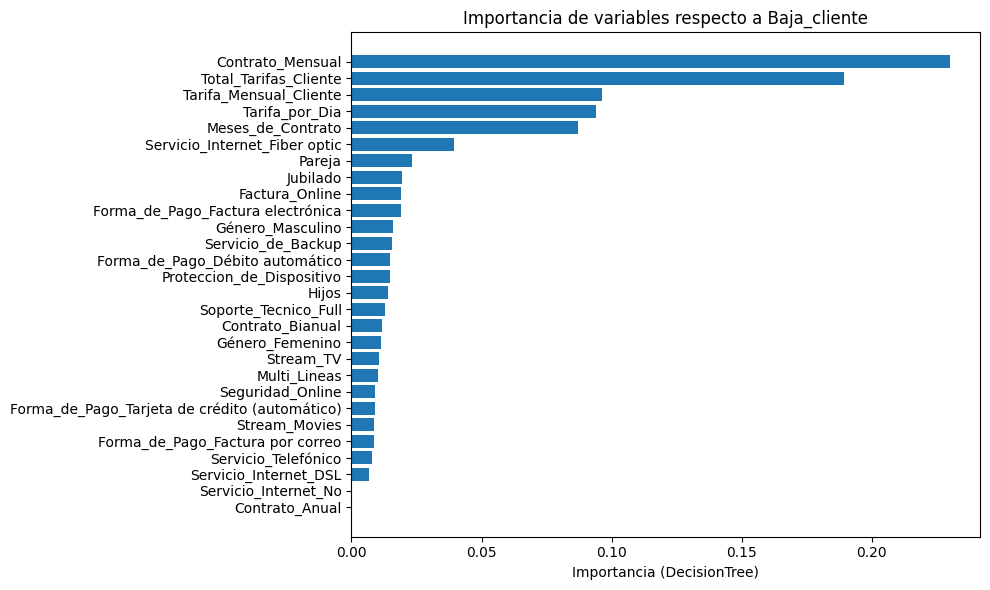

In [18]:
# Visualizando los resultados obtenidos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title('Importancia de variables respecto a Baja_cliente')
plt.xlabel('Importancia (DecisionTree)')
plt.tight_layout()
plt.show()


Se puede observar que existen multiples variables cuya importancia es irrelevante para el modelo de prediccion. Por lo tanto para tener mas certeza sobre cual conservar en el modelo a desarrollar, voy a extender el anilisis de importancia de variables usando un modelo más robusto: RandomForestClassifier.

In [19]:
from sklearn.ensemble import RandomForestClassifier


In [20]:
# Entrenamiento Random Forest

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=42)

In [21]:
# Obtener variables importantes

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [22]:
# Filtrado de variables poco importantes

# Umbral: 0.01 = 1% de importancia
umbral = 0.01
features_importantes = feature_importance_df[feature_importance_df['importance'] > umbral]['feature'].tolist()

# Nuevo DataFrame filtrado
X_filtrado = X[features_importantes]


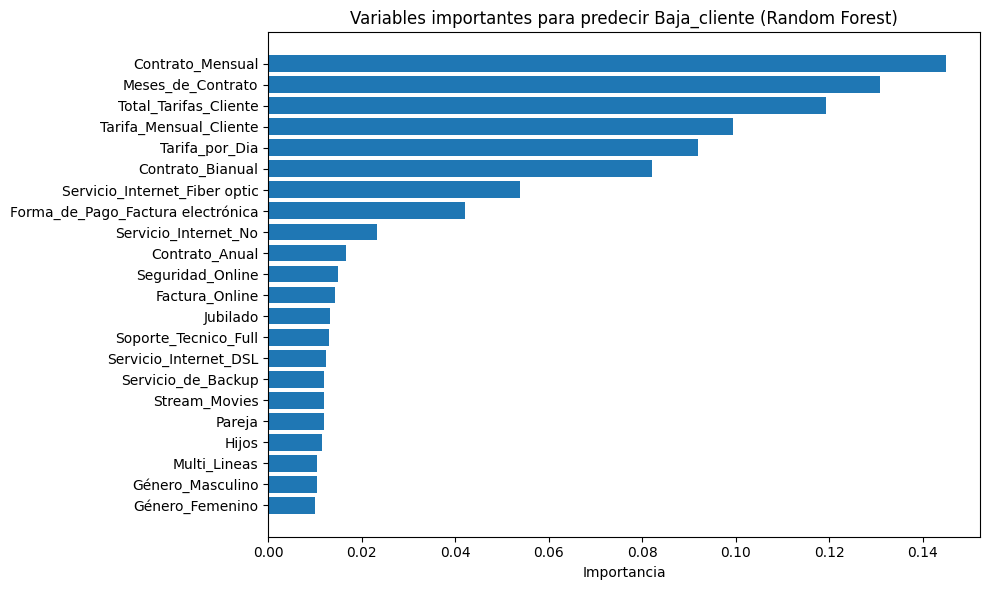

In [23]:
# Visualizacion de las variables importantes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df[feature_importance_df['importance'] > umbral]['feature'],
         feature_importance_df[feature_importance_df['importance'] > umbral]['importance'])
plt.gca().invert_yaxis()
plt.title('Variables importantes para predecir Baja_cliente (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


## Analisis dirigido a las principales variables específicas que se relacionan con la baja de clientes

### Meses de contrato en relacion a la Baja de clientes

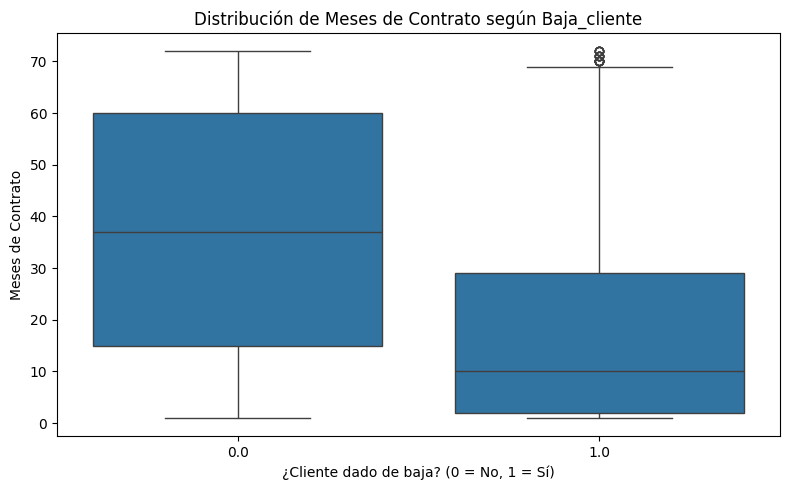

In [24]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_undersampled, x='Baja_cliente', y='Meses_de_Contrato')
plt.title('Distribución de Meses de Contrato según Baja_cliente')
plt.xlabel('¿Cliente dado de baja? (0 = No, 1 = Sí)')
plt.ylabel('Meses de Contrato')
plt.tight_layout()
plt.show()


Podemos observar que la mediana nos indica una tendencia a la cancelacion temprana en el rango de 9 a 10 meses.

### Total Tarifas de los Clientes en relacion a la Baja de clientes

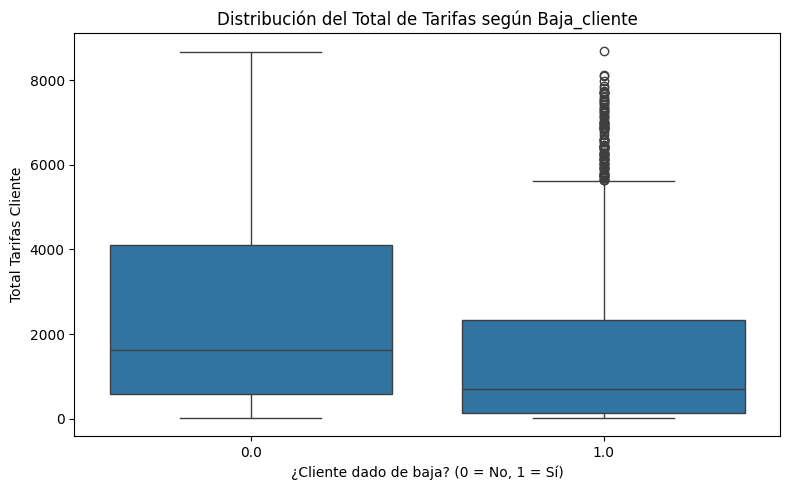

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_undersampled, x='Baja_cliente', y='Total_Tarifas_Cliente')
plt.title('Distribución del Total de Tarifas según Baja_cliente')
plt.xlabel('¿Cliente dado de baja? (0 = No, 1 = Sí)')
plt.ylabel('Total Tarifas Cliente')
plt.tight_layout()
plt.show()


Podemos observar que la mediana del gasto total de los clentes que se dan a la baja no supera el monto de 1000.

## Modelado predictivo para la baja de clientes

### Separacion de los datos para entrenar y validar el modelo

In [26]:
from sklearn.model_selection import train_test_split

# Dividir (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42, stratify=y)

# Visualizacion del tamaño de las muestras
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (2990, 22)
Tamaño de prueba: (748, 22)


### Modelo de prediccion RandomForest


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


rf_model.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))


# Evaluación
print(classification_report(y_test, y_pred_rf))


Matriz de confusión:
[[272 102]
 [ 76 298]]
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75       374
         1.0       0.74      0.80      0.77       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [28]:
# Comprobar si hay overfitting o underfitting


# Ya lo hiciste en test: y_test vs y_pred
# Haz esto también para entrenamiento:
y_pred_train_rf = rf_model.predict(X_train)
print(classification_report(y_train, y_pred_train_rf))


              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      1495
         1.0       0.86      0.96      0.90      1495

    accuracy                           0.90      2990
   macro avg       0.90      0.90      0.90      2990
weighted avg       0.90      0.90      0.90      2990



### Modelo de prediccion KNN

In [29]:
# Preparación de los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# División de muestras para KNN

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# Entrenamiento del modelo KNN

from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar modelo
knn = KNeighborsClassifier(n_neighbors=10)  # puedes ajustar este valor
knn.fit(X_train, y_train)

# Predecir
y_pred_KNN = knn.predict(X_test)


In [32]:
# evaluación del modelo KNN

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_KNN))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_KNN))


Matriz de confusión:
[[265 109]
 [ 80 294]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       374
         1.0       0.73      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



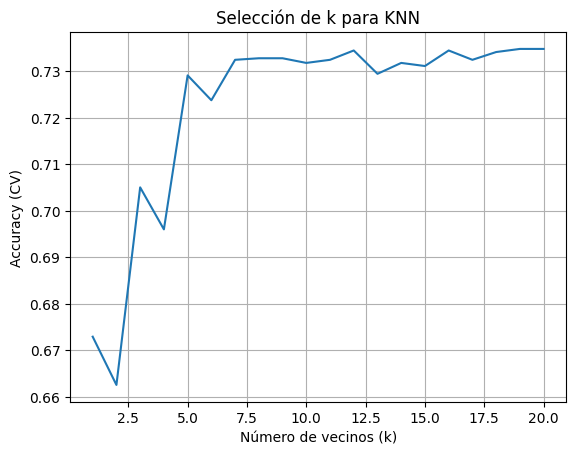

In [33]:
# gráfico de re-ajuste para el modelo KNN (sirvió para obtener 0.04 mas de presición)

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_range = range(1, 21)
scores = []

for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(k_range, scores)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy (CV)')
plt.title('Selección de k para KNN')
plt.grid()
plt.show()


In [34]:
# Comprobar si hay overfitting o underfitting


y_pred_train_KNN = knn.predict(X_train)
print(classification_report(y_train, y_pred_train_KNN))


              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      1495
         1.0       0.76      0.82      0.79      1495

    accuracy                           0.78      2990
   macro avg       0.78      0.78      0.78      2990
weighted avg       0.78      0.78      0.78      2990



### Evaluacion de los modelos RandomForest y KNN

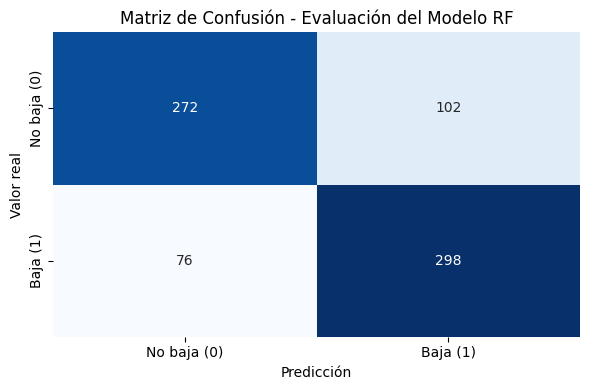

In [35]:
# Matriz de confusión Modelo RandomForest
cm = confusion_matrix(y_test, y_pred_rf)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No baja (0)', 'Baja (1)'],
            yticklabels=['No baja (0)', 'Baja (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Evaluación del Modelo RF')
plt.tight_layout()

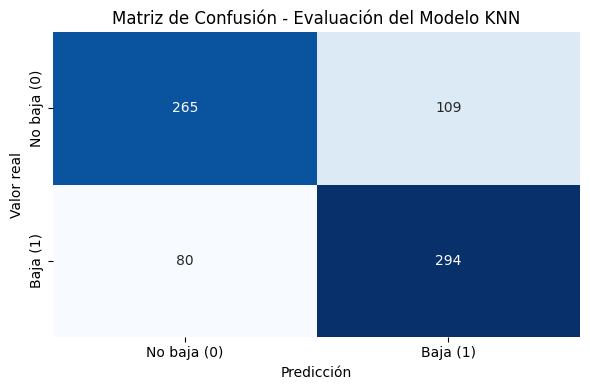

In [36]:
# Evaluación del modelo KNN

# Matríz de confusión
cm = confusion_matrix(y_test, y_pred_KNN)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No baja (0)', 'Baja (1)'],
            yticklabels=['No baja (0)', 'Baja (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Evaluación del Modelo KNN')
plt.tight_layout()

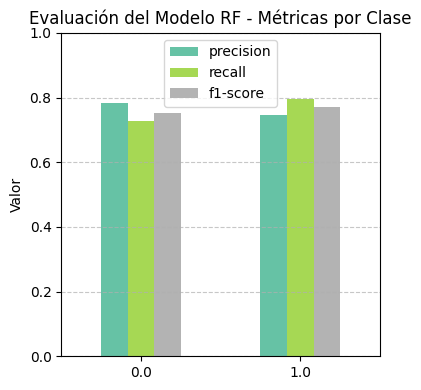

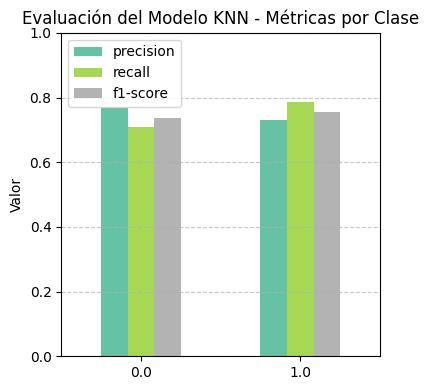

In [37]:
# Metricas del modelo RF

# Obtener los valores como diccionario
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Convertir a DataFrame y gráficar
df_report = pd.DataFrame(report_dict).transpose().iloc[:2]  # Solo clases 0 y 1

df_report[['precision', 'recall', 'f1-score']].plot(
    kind='bar', figsize=(4, 4), colormap='Set2')
plt.title('Evaluación del Modelo RF - Métricas por Clase')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Métricas del modelo KNN

# Obtener los valores como diccionario
report_dict = classification_report(y_test, y_pred_KNN, output_dict=True)

# Convertir a DataFrame y gráficar
df_report = pd.DataFrame(report_dict).transpose().iloc[:2]  # Solo clases 0 y 1

df_report[['precision', 'recall', 'f1-score']].plot(
    kind='bar', figsize=(4, 4), colormap='Set2')
plt.title('Evaluación del Modelo KNN - Métricas por Clase')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Comparacion final de los modelos

In [38]:
# Métricas de cada modelos
metricas = {
    'Métrica': ['Accuracy', 'Precision Clase 1', 'Recall Clase 1', 'F1-score Clase 1'],
    'Random Forest': [0.76, 0.74, 0.80, 0.77],
    'KNN': [0.75, 0.73, 0.79, 0.76]
}

df_comparacion = pd.DataFrame(metricas)
df_comparacion.set_index('Métrica', inplace=True)
print(df_comparacion)


                   Random Forest   KNN
Métrica                               
Accuracy                    0.76  0.75
Precision Clase 1           0.74  0.73
Recall Clase 1              0.80  0.79
F1-score Clase 1            0.77  0.76


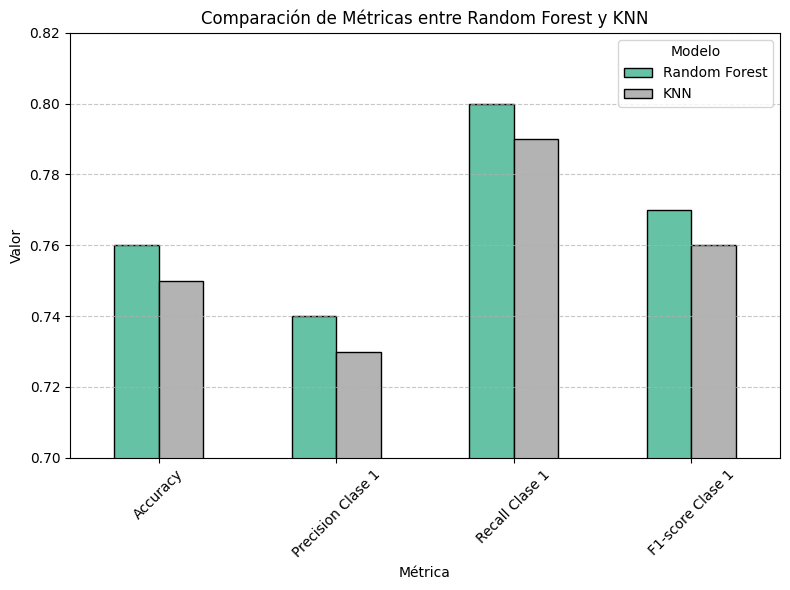

In [39]:
# Gráfico
df_comparacion.plot(kind='bar', figsize=(8, 6), colormap='Set2', edgecolor='black')
plt.title('Comparación de Métricas entre Random Forest y KNN')
plt.ylabel('Valor')
plt.ylim(0.7, 0.82)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

#📄Interpretacion y Conclusiones

## Análisis de las variables más importantes para la predicción de la cancelación de clientes.

### Regresion Logística

In [40]:
# Entrenamiento del modelo de Regresión Logistica

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Dividir los datos escalados en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar modelo
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Extracción de los coeficientes del modelo

# Obtener nombres de las columnas

feature_names = X.columns

# Extraer coeficientes
coeficientes = logreg.coef_[0]

# Armar DataFrame con resultados
df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes
})

# Ordenar por importancia absoluta
df_coef['Importancia'] = df_coef['Coeficiente'].abs()
df_coef.sort_values(by='Importancia', ascending=False, inplace=True)
print(df_coef)


                                         Variable  Coeficiente  Importancia
3                               Meses_de_Contrato    -1.318652     1.318652
14                          Total_Tarifas_Cliente     0.716257     0.716257
22                               Contrato_Bianual    -0.325062     0.325062
23                               Contrato_Mensual     0.297984     0.297984
20                           Servicio_Internet_No    -0.263494     0.263494
19                  Servicio_Internet_Fiber optic     0.219898     0.219898
4                             Servicio_Telefónico    -0.216102     0.216102
9                            Soporte_Tecnico_Full    -0.165791     0.165791
6                                Seguridad_Online    -0.140788     0.140788
12                                 Factura_Online     0.137418     0.137418
7                              Servicio_de_Backup    -0.130234     0.130234
13                         Tarifa_Mensual_Cliente     0.113710     0.113710
15          

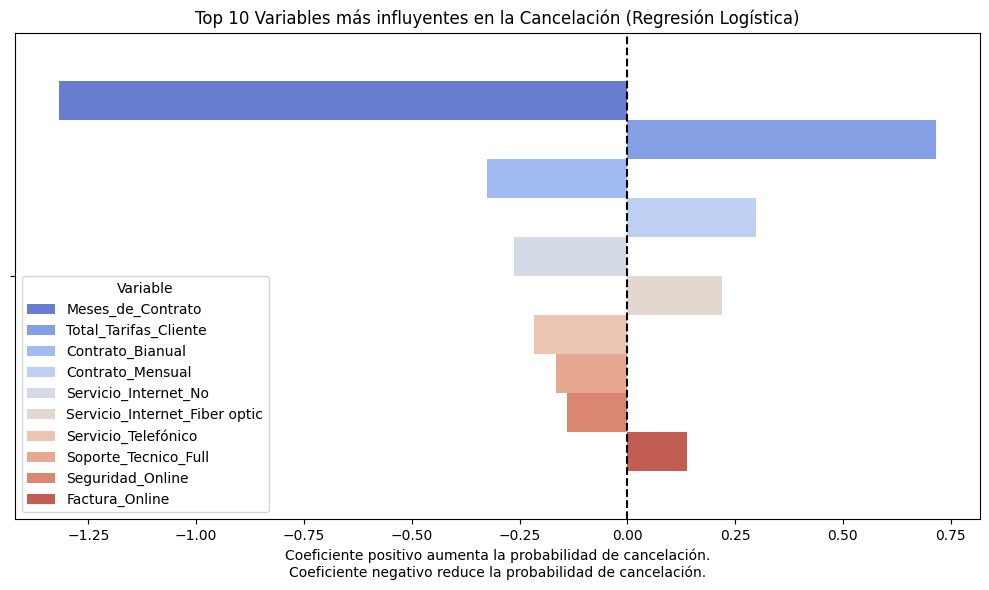

In [42]:
# Visualización

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_coef.head(10),
            x='Coeficiente',
            hue='Variable',
            palette='coolwarm',
            legend= True)
plt.title('Top 10 Variables más influyentes en la Cancelación (Regresión Logística)')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Coeficiente positivo aumenta la probabilidad de cancelación.\nCoeficiente negativo reduce la probabilidad de cancelación.')
plt.tight_layout()
plt.show()


### KNN (K-Nearest Neighbors)

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

# Tomamos un subconjunto de 100 datos para ilustrar (por velocidad)
X_small = X[:100].copy()
X_small_scaled = StandardScaler().fit_transform(X_small)

# Calculamos distancia media para cada variable alterada
sensibilidad = []

for i, col in enumerate(X_small.columns):
    X_alterado = X_small_scaled.copy()
    X_alterado[:, i] += 0.5  # Perturbación artificial

    dist_original = pairwise_distances(X_small_scaled, X_small_scaled).mean()
    dist_perturbado = pairwise_distances(X_alterado, X_small_scaled).mean()

    delta = dist_perturbado - dist_original
    sensibilidad.append((col, delta))

# Convertir a DataFrame y ordenar
df_sensibilidad = pd.DataFrame(sensibilidad, columns=['Variable', 'Cambio_distancia'])
df_sensibilidad.sort_values(by='Cambio_distancia', ascending=False, inplace=True)
print(df_sensibilidad)


                                         Variable  Cambio_distancia
4                             Servicio_Telefónico          0.022375
14                          Total_Tarifas_Cliente          0.022374
13                         Tarifa_Mensual_Cliente          0.022357
15                                 Tarifa_por_Dia          0.022357
7                              Servicio_de_Backup          0.022310
11                                  Stream_Movies          0.022310
19                  Servicio_Internet_Fiber optic          0.022309
0                                        Jubilado          0.022286
8                       Proteccion_de_Dispositivo          0.022271
10                                      Stream_TV          0.022268
9                            Soporte_Tecnico_Full          0.022262
25              Forma_de_Pago_Factura electrónica          0.022253
6                                Seguridad_Online          0.022250
20                           Servicio_Internet_N

In [44]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Evaluar la importancia con permutación
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Crear DataFrame con resultados
df_importancia_knn = pd.DataFrame({
    'Variable': X.columns,
    'Importancia_media': result.importances_mean,
    'Importancia_std': result.importances_std
})

# Ordenar por importancia
df_importancia_knn = df_importancia_knn.sort_values(by='Importancia_media', ascending=False)
print(df_importancia_knn.head(10))  # Las 10 más importantes


                                         Variable  Importancia_media  \
3                               Meses_de_Contrato           0.011497   
13                         Tarifa_Mensual_Cliente           0.011230   
15                                 Tarifa_por_Dia           0.011230   
20                           Servicio_Internet_No           0.011230   
27  Forma_de_Pago_Tarjeta de crédito (automático)           0.010027   
21                                 Contrato_Anual           0.009893   
11                                  Stream_Movies           0.007086   
14                          Total_Tarifas_Cliente           0.007086   
23                               Contrato_Mensual           0.006818   
19                  Servicio_Internet_Fiber optic           0.006818   

    Importancia_std  
3          0.006500  
13         0.005583  
15         0.005583  
20         0.003838  
27         0.005082  
21         0.007472  
11         0.005514  
14         0.007176  
23       

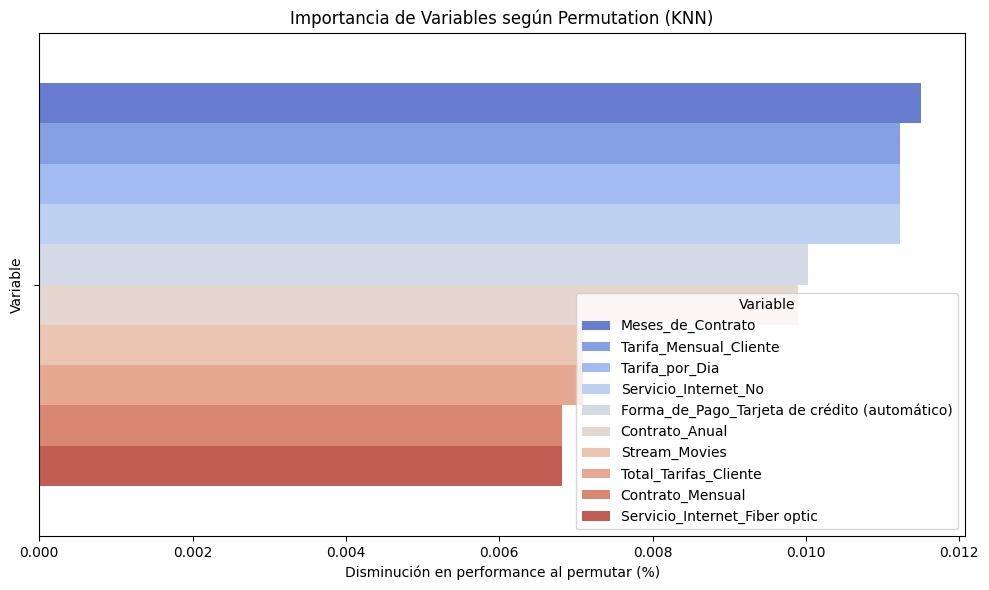

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importancia_media',
    hue='Variable',
    data=df_importancia_knn.head(10),  # Still using head(10) to plot only the top 10
    palette='coolwarm',
    legend= True
)
plt.title('Importancia de Variables según Permutation (KNN)')
plt.xlabel('Disminución en performance al permutar (%)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Random Forest

In [46]:
# Extraer importancias
importancias = rf_model.feature_importances_

# Armar DataFrame
df_importancia_rf = pd.DataFrame({
    'Variable': X_filtrado.columns,
    'Importancia': importancias
})

# Ordenar por importancia
df_importancia_rf.sort_values(by='Importancia', ascending=False, inplace=True)
print(df_importancia_rf.head(10))

                            Variable  Importancia
1                  Meses_de_Contrato     0.140301
2              Total_Tarifas_Cliente     0.137753
0                   Contrato_Mensual     0.115685
4                     Tarifa_por_Dia     0.107010
3             Tarifa_Mensual_Cliente     0.106206
5                   Contrato_Bianual     0.071165
7  Forma_de_Pago_Factura electrónica     0.042168
6      Servicio_Internet_Fiber optic     0.040744
8               Servicio_Internet_No     0.030730
9                     Contrato_Anual     0.025856


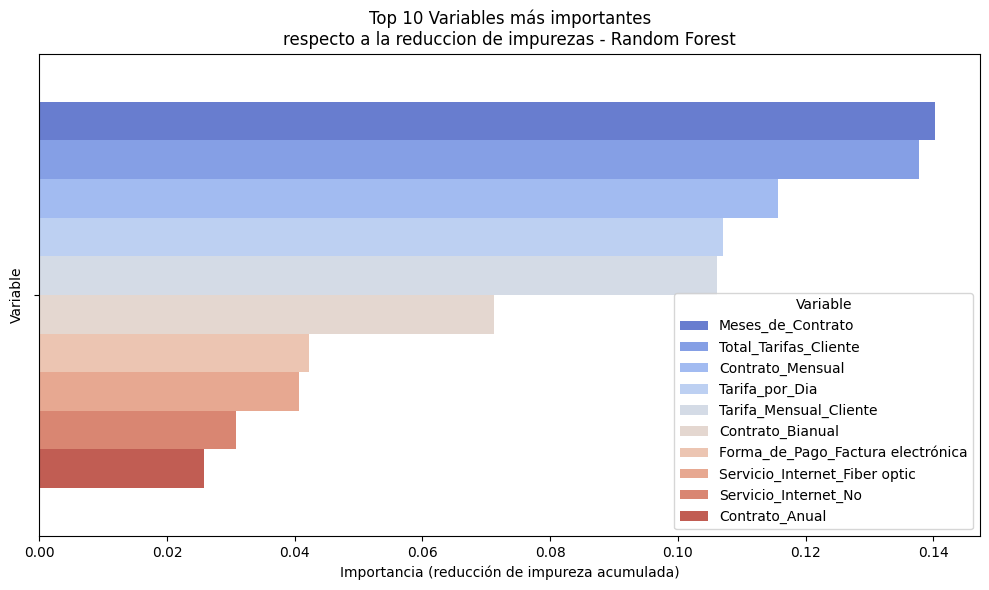

In [47]:
# Visualización de las variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importancia',
    hue='Variable',
    data=df_importancia_rf.head(10),
    palette='coolwarm',
    legend = True
)
plt.title('Top 10 Variables más importantes\nrespecto a la reduccion de impurezas - Random Forest')
plt.xlabel('Importancia (reducción de impureza acumulada)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### SVM (Support Vector Machine)

In [48]:
from sklearn.svm import SVC

# Reutilización de mis datos escalados
X_train_scaled = X_train_scaled
X_test_scaled = X_test_scaled


# Modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)



SVC(kernel='linear', random_state=42)

In [49]:
# Extracción de los coeficientes

# Obtener coeficientes del modelo
coeficientes = svm_model.coef_[0]

# Armar DataFrame con importancia
df_importancia_svm = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': coeficientes,
    'Importancia_absoluta': np.abs(coeficientes)
})

# Ordenar por importancia
df_importancia_svm.sort_values(by='Importancia_absoluta', ascending=False, inplace=True)
print(df_importancia_svm.head(10))


                         Variable  Coeficiente  Importancia_absoluta
20           Servicio_Internet_No    -0.575827              0.575827
23               Contrato_Mensual     0.528622              0.528622
22               Contrato_Bianual    -0.335722              0.335722
21                 Contrato_Anual    -0.330431              0.330431
19  Servicio_Internet_Fiber optic     0.234320              0.234320
18          Servicio_Internet_DSL     0.217168              0.217168
15                 Tarifa_por_Dia     0.001107              0.001107
13         Tarifa_Mensual_Cliente     0.001107              0.001107
3               Meses_de_Contrato    -0.000593              0.000593
4             Servicio_Telefónico    -0.000537              0.000537


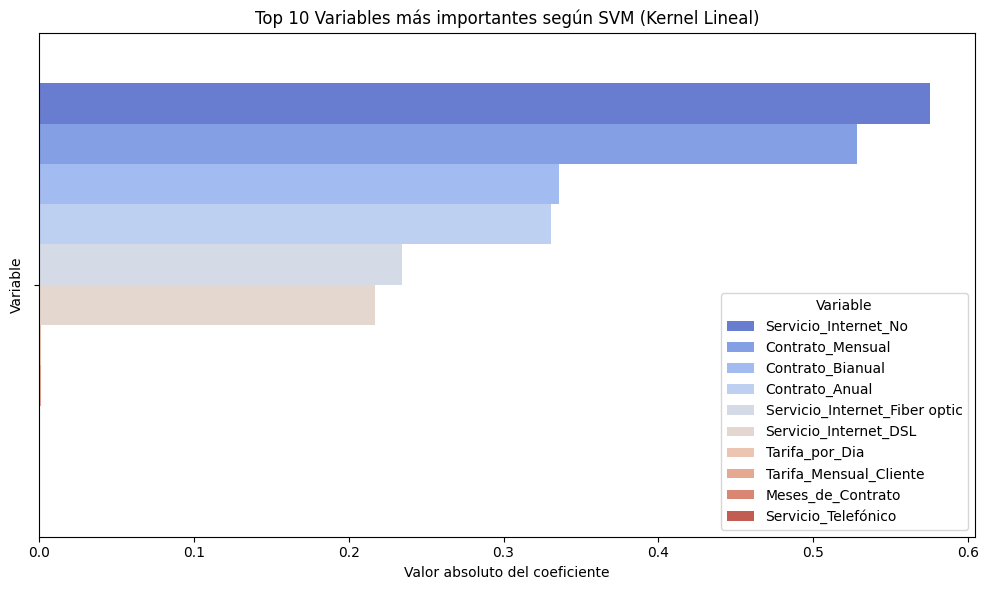

In [50]:
# Visualización de la importancia de las variables con SVM

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importancia_absoluta',
    hue='Variable',
    data=df_importancia_svm.head(10),
    palette='coolwarm',
    legend = True
)
plt.title('Top 10 Variables más importantes según SVM (Kernel Lineal)')
plt.xlabel('Valor absoluto del coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Importancia de variables en una red neuronal (MLPClassifier)

In [51]:
from sklearn.neural_network import MLPClassifier

## Reutilización de mis datos escalados
X_train_scaled = X_train_scaled
X_test_scaled = X_test_scaled

# Red neuronal básica
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

In [52]:
# Evaluar la importancia
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Armar DataFrame
df_importancia_mlp = pd.DataFrame({
    'Variable': X.columns,
    'Importancia_media': result.importances_mean,
    'Importancia_std': result.importances_std
})

# Ordenar
df_importancia_mlp.sort_values(by='Importancia_media', ascending=False, inplace=True)
print(df_importancia_mlp.head(10))


                             Variable  Importancia_media  Importancia_std
14              Total_Tarifas_Cliente           0.075401         0.007400
22                   Contrato_Bianual           0.053075         0.006040
21                     Contrato_Anual           0.019519         0.005583
25  Forma_de_Pago_Factura electrónica           0.019251         0.006636
4                 Servicio_Telefónico           0.015107         0.003167
11                      Stream_Movies           0.014706         0.008868
23                   Contrato_Mensual           0.013503         0.005932
19      Servicio_Internet_Fiber optic           0.012834         0.006333
0                            Jubilado           0.012701         0.005221
20               Servicio_Internet_No           0.012567         0.005985


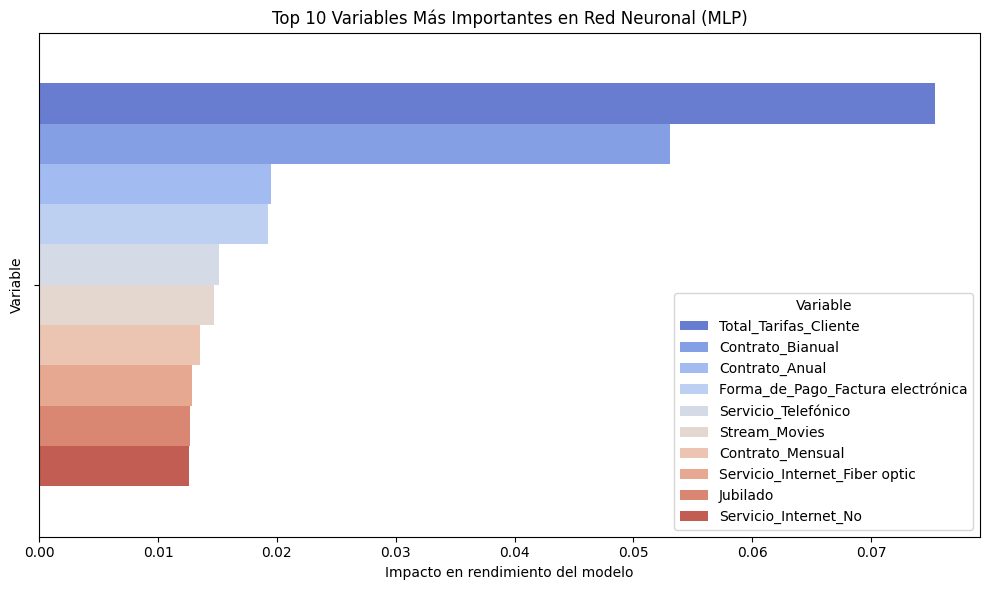

In [53]:
# Visualización de las variables más importantes en la red neuronal

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_importancia_mlp.head(10),
    x='Importancia_media',
    hue='Variable',
    palette='coolwarm',
    legend = True
)
plt.title('Top 10 Variables Más Importantes en Red Neuronal (MLP)')
plt.xlabel('Impacto en rendimiento del modelo')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()



**Muchas gracías por su atención!**

Documento elaborado por: **Agustín Villalobos**